In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### 1 Problème jouet
Pour ce premier exercice, vous allez implémenter et tester la regression logistique sur un problème ”jouet”. Ce problème comprend des points étiquetés (x, yi) ∈ R2 × {λ1, λ2}, et les distributions des classes suivent une loi normale, i.e. $λ_1$ ∼ N ($μ_1$, $σ^2_1$ )  et  $λ_2$ ∼ N ($μ_2$, $σ^2_2$ ).

1. Générez cette base de données synthétiques telle que :
- chaque classe contient 300 points
- $λ_1$ ∼ N ((1, 1), 0.7) et $λ_2$ ∼ N ((−1, −1), 0.7)

In [18]:
n = 300
c1 = np.random.normal((1,1), 0.7, (n, 2))
c2 = np.random.normal((-1,-1), 0.7, (n, 2))

In [19]:
labels_1 = np.ones(n) # c1 = 1
labels_2 = np.zeros(n) # c2 = 0

data = np.vstack((c1, c2))
labels = np.hstack((labels_1, labels_2))

2. Affichez le nuage de points pour obtenir un résultat similaire à celui de la figure 1

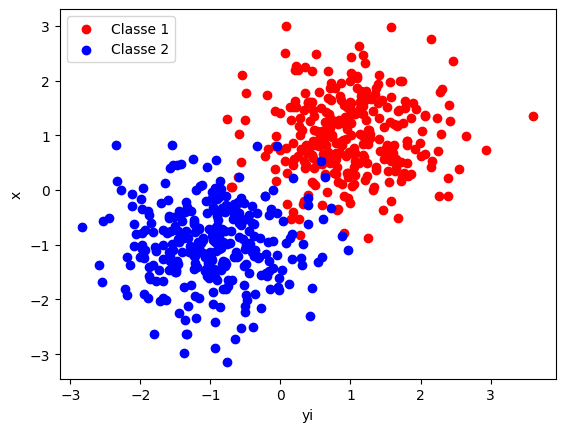

In [20]:
def plot_data():
    plt.scatter(c1[:, 0], c1[:, 1], color='red', label='Classe 1')
    plt.scatter(c2[:, 0], c2[:, 1], color='blue', label='Classe 2')
    plt.legend()
    plt.xlabel("yi")
    plt.ylabel("x")
    plt.show()

plot_data()


Avant d’implémenter votre propre méthode de régression logistique, vous allez tester celle de scikit-learn :

3. Importez la module de régression logistique de scikit-learn 1 et lancer l’entrainement sur la base synthétique que vous venez de créer

In [21]:
log_reg = LogisticRegression(random_state=0).fit(data, labels)

4. Affichez la fonction de décision du modèle, comme montré en figure 2. Pour cela :
- Générez une grille de points 2D
- Rassembler les prédictions du modèle pour chacun des points de cette grille.
- Afficher le nuage de points de la base d’apprentissage
- Afficher les frontières de décisions en utilisant la fonction contourf de Matplotlib.

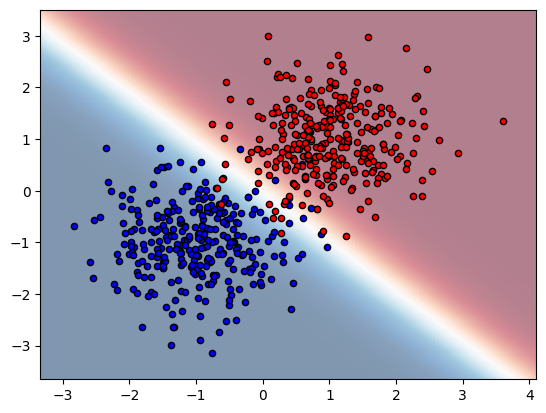

In [22]:
def mesh(X, h=0.02):
    x_min , x_max = X[:, 0]. min() - .5, X[:, 0]. max() + .5
    y_min , y_max = X[:, 1]. min() - .5, X[:, 1]. max() + .5
    xx , yy = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))
    return np.c_[xx.ravel (), yy.ravel ()], xx , yy

xtest_grid , xx , yy = mesh(data)
Z = log_reg.predict_proba(xtest_grid)[:, 0]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

### 2 Régression logistique sur le problème jouet
Vous allez maintenant implémenter votre propre modèle de regression logistique. Pour cela :
1. Implémentez le calcul du coût en complétant la fonction ci-dessous :

In [23]:
def logreg_cost(X, y, w):
    z = X @ w
    cost = -np.sum(z @ y) + np.sum(np.log(1+np.exp(z)))
    # cost = -np.sum(y * z) + np.sum(np.log(1 + np.exp(z)))
    return cost

2. Implémentez le calcul du gradient de la fonction de coût en complétant la fonction ci-dessous :

In [24]:
def logreg_grad(X, y, w):
    z = X @ w
    p = np.exp(z)/(1 + np.exp(z))
    grad = -np.sum((y - p) @ X)
    # grad = -X.T @ (y - p)
    return grad

3. Implémentez l’estimation des paramètres du modèle de regression logistique en utilisant la méthode de descente de gradient :

In [25]:
def logreg_descent(X, y, learning_rate =1e-3, max_iter =1000):
    n, d = X.shape
    X = np.concatenate ((X, np.ones((n, 1))), axis =1)
    w = np.random.randn(d+1)
    step = learning_rate
    beta = 0.9 # for backtracking if needed - to tune
    
    costs = np.zeros(max_iter)

    for i in range(max_iter):
        w = w - step*logreg_grad(X, y, w)
        # w -= (step / n) * logreg_grad(X, y, w)
        costs[i] = logreg_cost(X, y, w)

    return w, costs

    

4. Tracez la courbe de l’évolution du coût au fil de l’apprentissage. Commentez ce résultat.

C:\Users\ferna\AppData\Local\Temp\ipykernel_22168\1785841002.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


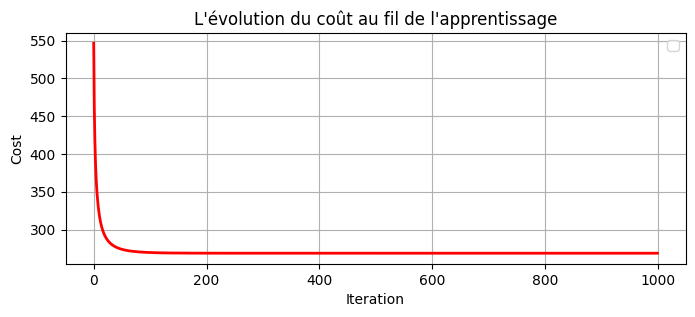

In [26]:
wmin, costs = logreg_descent(data, labels)

plt.figure(figsize=(8, 3))
plt.plot(range(1000), costs, color="red", linewidth=2)
plt.title("L'évolution du coût au fil de l'apprentissage")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

5. Affichez la fonction de décision résultante comme à l’exercice précédent. Commentez ce résultat

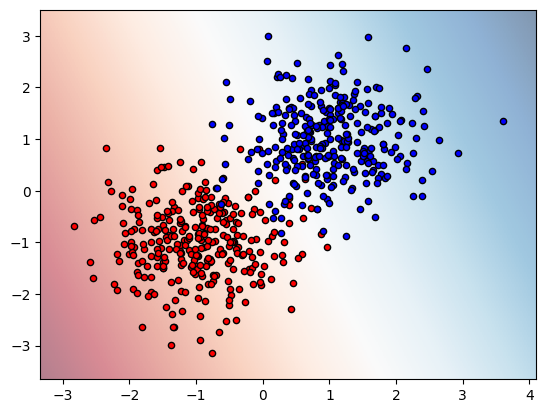

In [27]:
xtest_grid, xx, yy = mesh(data)
xtest_grid = np.concatenate((xtest_grid, np.ones((xtest_grid.shape[0], 1))), axis=1)  # Adiciona bias

Z = xtest_grid @ wmin
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='r', edgecolors="k", s=20)
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='b', edgecolors="k", s=20)
plt.show()


6. Estimez les performances en généralisation de votre méthode.

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=42)

X = np.concatenate((data_test, np.ones((data_test.shape[0], 1))), axis=1)
preds = (X @ wmin >= 0).astype(int)
accuracy = np.mean(preds == labels_test)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.8667


In [30]:
n_runs = 10
accuracy_logreg = []


for _ in range(n_runs):
    data2 = np.concatenate((data, np.ones((data.shape[0], 1))), axis=1)  # Adiciona bias
    y_pred_logreg = (data2 @ wmin >= 0).astype(int)
    accuracy_logreg.append(accuracy_score(labels, y_pred_logreg))

print(f"Régression Logistique (logreg_descent) - Moyenne : {np.mean(accuracy_logreg):.4f}, Écart-type : {np.std(accuracy_logreg):.4f}")
print(accuracy_logreg)

Régression Logistique (logreg_descent) - Moyenne : 0.8500, Écart-type : 0.0000
[0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]


### 3 Diagnostique médical
On propose maintenant de tester votre modèle sur un problème réel d’aide au diagnostique de cancer du sein à partir d’images de biopsie à l’aiguille fine. Plusieurs caractéristiques ont été calculées pour décrire les noyaux cellulaires présents sur chaque image. Cette base de données est disponible et documentée dans scikit-learn. Note that the data in this dataset is not normalised.

1. Comparez votre algorithme de régression logistique à l’implémentation de scikit-learn sur ce dataset. Les résultats seront présentés avec des taux de bonne classification moyen et des écart-types.

In [13]:
# Charger le dataset Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Normalisation des données (important pour la descente de gradient)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [14]:
accuracy_logreg = []
accuracy_sklearn = []

for _ in range(n_runs):
    
    # Diviser en entraînement et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Ajouter le biais après la séparation
    X_test_b = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

    # Entraîner votre modèle (logreg_descent)
    wmin, costs = logreg_descent(X_train, y_train, learning_rate=1e-3, max_iter=1000)

    # Prédictions et évaluation
    y_pred_logreg = (X_test_b @ wmin >= 0).astype(int)
    accuracy_logreg.append(accuracy_score(y_test, y_pred_logreg))

    # Entraîner LogisticRegression de scikit-learn
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Prédictions et évaluation
    y_pred_sklearn = model.predict(X_test)
    accuracy_sklearn.append(accuracy_score(y_test, y_pred_sklearn))

# Afficher les résultats
print(f"Régression Logistique (logreg_descent) - Moyenne : {np.mean(accuracy_logreg):.4f}, Écart-type : {np.std(accuracy_logreg):.4f}")
print(f"Régression Logistique (scikit-learn) - Moyenne : {np.mean(accuracy_sklearn):.4f}, Écart-type : {np.std(accuracy_sklearn):.4f}")

Régression Logistique (logreg_descent) - Moyenne : 0.8491, Écart-type : 0.0348
Régression Logistique (scikit-learn) - Moyenne : 0.9816, Écart-type : 0.0100


2. Comparez maintenant avec un algorithme de regression logistique régularisée en utilisant l’implémentation de scikit-learn

In [15]:
accuracy_sklearn_l2 = []

for _ in range(n_runs):
    # Diviser en train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Entraîner LogisticRegression avec régularisation L2 (par défaut)
    model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
    model_l2.fit(X_train, y_train)
    y_pred_sklearn_l2 = model_l2.predict(X_test)
    accuracy_sklearn_l2.append(accuracy_score(y_test, y_pred_sklearn_l2))

# Afficher les résultats
print(f"Régression Logistique (logreg_descent) - Moyenne : {np.mean(accuracy_logreg):.4f}, Écart-type : {np.std(accuracy_logreg):.4f}")
print(f"Régression Logistique (scikit-learn, sans régularisation) - Moyenne : {np.mean(accuracy_sklearn):.4f}, Écart-type : {np.std(accuracy_sklearn):.4f}")
print(f"Régression Logistique (scikit-learn, régularisation L2) - Moyenne : {np.mean(accuracy_sklearn_l2):.4f}, Écart-type : {np.std(accuracy_sklearn_l2):.4f}")


Régression Logistique (logreg_descent) - Moyenne : 0.8491, Écart-type : 0.0348
Régression Logistique (scikit-learn, sans régularisation) - Moyenne : 0.9816, Écart-type : 0.0100
Régression Logistique (scikit-learn, régularisation L2) - Moyenne : 0.9754, Écart-type : 0.0116


3. Analysez et commentez les résultats de chaque test